# Import Libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
%matplotlib inline

# Read Data

In [2]:
job_df = pd.read_csv('datasets/DataAnalyst.csv')

In [25]:
job_df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,Department
0,"Data Analyst, Center on Immigration and Justice",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66,CIJ)
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,False,37,66,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,NaN
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,False,37,66,NaN
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,NaN


# Data Anlysis

In [4]:
job_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1126.00,650.53,0.0,563.0,1126.0,1689.0,2252.0
Rating,2253.0,3.16,1.67,-1.0,3.1,3.6,4.0,5.0
Founded,2253.0,1398.52,901.93,-1.0,-1.0,1979.0,2002.0,2019.0


In [5]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [6]:
job_df['Salary Estimate'].nunique()

90

In [7]:
job_df.groupby('Job Title')['Rating'].mean().sort_values(ascending=False)

Job Title
Data Validation Analyst                      5.0
Software Engineer/Data Analyst               5.0
Data Studio Analyst                          5.0
Data Transformation Analyst                  5.0
QA Data Analyst                              5.0
                                            ... 
Partner Training Data Analyst               -1.0
Patient Recruitment Data Analyst (ArcGIS)   -1.0
Pharmaceutical Data Analyst – Analytics     -1.0
Power BI Data Analyst                       -1.0
【1yr OPT+Intern】Data Analyst 保实习保就业         -1.0
Name: Rating, Length: 1272, dtype: float64

In [8]:
job_df=job_df.replace(-1,np.nan)
job_df=job_df.replace(-1.0,np.nan)
job_df=job_df.replace('-1',np.nan)
job_df=job_df.replace('', np.nan)

In [9]:
job_df['Salary Estimate'], _ = job_df['Salary Estimate'].str.split('(', 1).str

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [10]:
job_df['Min_Salary'], job_df['Max_Salary'] = job_df['Salary Estimate'].str.split('-').str

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [11]:
job_df.Min_Salary.unique()

array(['$37K', '$46K', '$51K', '$59K', '$43K', '$60K', '$41K', '$45K',
       '$73K', '$84K', '$27K', '$42K', '$77K', '$98K', '$48K', '$26K',
       '$31K', '$47K', '$49K', '$30K', '$55K', '$57K', '$35K', '$65K',
       '$113K', '$67K', '$97K', '$68K', '$29K', '$74K', '$53K', '$38K',
       '$64K', '$50K', '$76K', '$34K', '$24K', '$44K', '$110K', '$89K',
       '$69K', '$58K', '$63K', '$40K', '$28K', '$54K', '$99K', '$93K',
       '$82K', nan, '$32K', '$36K', '$78K'], dtype=object)

In [12]:
job_df['Min_Salary'] = job_df['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [13]:
job_df['Max_Salary'] = job_df['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [14]:
job_df.groupby('Job Title')['Rating','Max_Salary'].mean().sort_values(by='Max_Salary', ascending=False).head(10)

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rating,Max_Salary
Job Title,,
Data Analyst with Data Mapping and API,NaN,190.0
AI Insights Data Analyst,5.0,190.0
"Data Analyst (SQL, Hive)",4.4,190.0
"Data Analyst, Product Insights",3.3,190.0
Tableau Data Analyst Intern,4.0,190.0
Senior HR Data Analyst,4.6,190.0
Sr. Data Analyst - Growth & Adoption,3.9,190.0
"Data Analyst, Autonomy Operations",4.4,190.0
Senior Data Analyst Studio Finance Engineering,3.9,190.0


In [15]:
job_df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
job_df.drop('Salary Estimate', axis=1, inplace=True)

In [17]:
job_df['Job Title'], job_df['Department'] = job_df['Job Title'].str.split('(', 1).str

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [18]:
job_df['Company Name'], _ = job_df['Company Name'].str.split('\n', 1).str

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [24]:
job_df['Easy Apply'] = job_df['Easy Apply'].fillna(False).astype('bool')

In [27]:
easy_apply_df = job_df[job_df['Easy Apply'] == True]

In [34]:
df = easy_apply_df.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df = df.sort_values(by='Easy Apply', ascending=False).head(10)

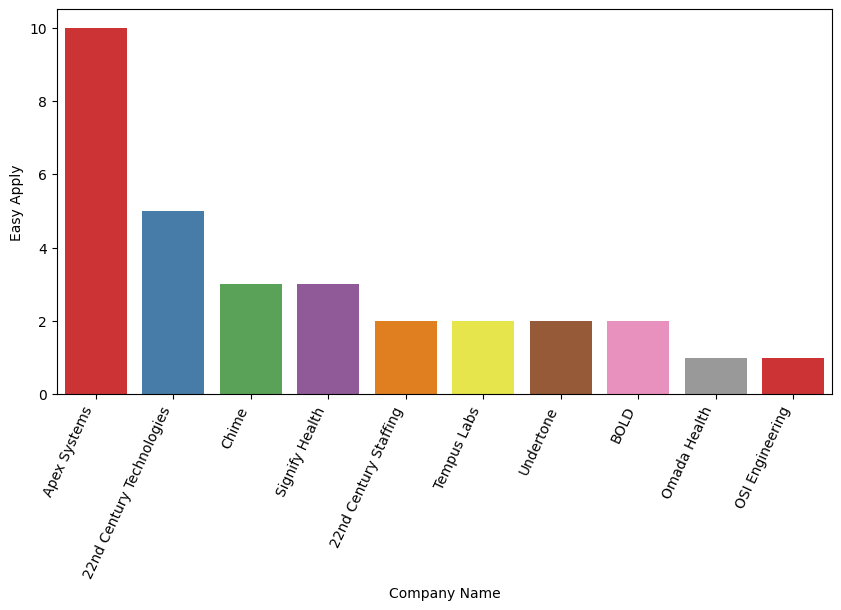

In [43]:
plt.figure(figsize=(10, 5))
chart = sns.barplot(data=company_opening_df, x='Company Name', y='Easy Apply', palette='Set1')
chart = chart.set_xticklabels(
        chart.get_xticklabels(),
        rotation=65,
        horizontalalignment='right',
        fontweight='light'
)

In [45]:
job_df[job_df['Job Title'] == 'Data Analyst']

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,Department
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,False,37,66,NaN
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,False,37,66,NaN
8,Data Analyst,The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896.0,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",False,37,66,NaN
10,Data Analyst,NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,"New York, NY","New York, NY",10000+ employees,1841.0,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",False,37,66,NaN
11,Data Analyst,BulbHead is currently seeking a Data Analyst t...,NaN,BulbHead,"Fairfield, NJ",NaN,1 to 50 employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,NaN,False,37,66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,Data Analyst,RESPONSIBILITIES:\n\nKforce has a client in se...,4.1,Kforce,"Denver, CO","Tampa, FL",10000+ employees,1966.0,Company - Public,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),NaN,False,49,91,NaN
2197,Data Analyst,Job Description\nVoca Technology has immediate...,4.7,Voca,"Centennial, CO","Rochester, MN",201 to 500 employees,2005.0,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,"Randstad, Kelly",False,49,91,NaN
2200,Data Analyst,Role Data Analyst Duration12+ months Location ...,NaN,"TechAspect Solutions, Inc. dba TA Digital","Centennial, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,49,91,NaN
2203,Data Analyst,Company Description\n\nClientSolv Technologies...,3.3,ClientSolv Technologies,"Broomfield, CO","Greenwood Village, CO",51 to 200 employees,1994.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),NaN,False,49,91,NaN


F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


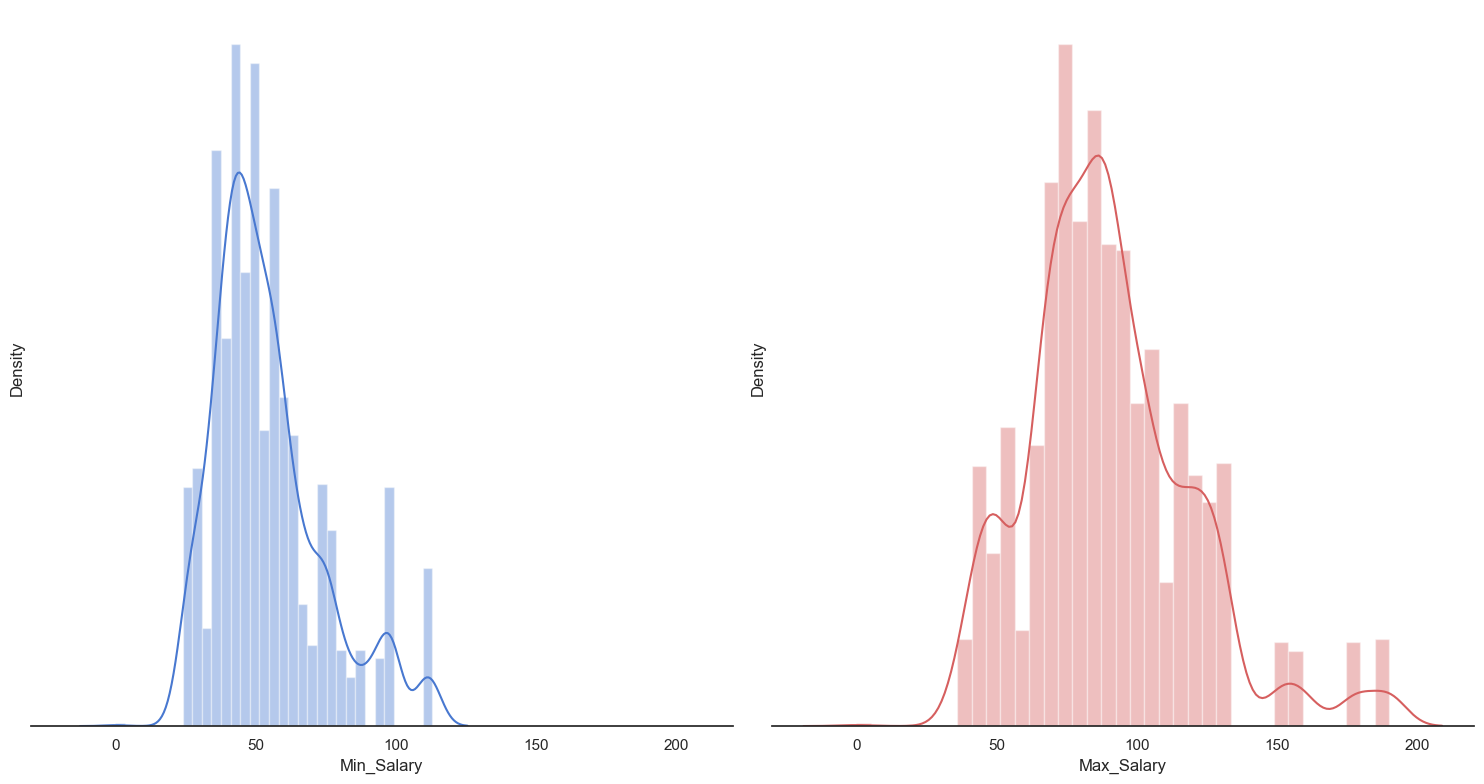

In [54]:
sns.set(style='white', palette='muted', color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)
sns.distplot(job_df['Min_Salary'], color='b', ax=axes[0])
sns.distplot(job_df['Max_Salary'], color='r', ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [58]:
df =  job_df.groupby('Location')['Min_Salary', 'Max_Salary'].mean().sort_values(['Min_Salary', 'Max_Salary'], ascending=False).head(20)

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [62]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df, y=df['Min_Salary'], name="Minimum Salary"))
fig.add_trace(go.Bar(x=df, y=df['Max_Salary'], name="Maximum Salary"))
fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')
fig.show()

In [87]:
def bar_plot(df, col1, col2):
    plt.figure(figsize=(12,8))
    plt.title("Top 20 cities with their minimum and maximum salaries")
    plt.bar(x=df.index, height=col1, data=df)
    plt.bar(x=df.index, height=col2, data=df, bottom=col1)
    plt.xticks(rotation=75)
    plt.legend([col1.name, col2.name])
    plt.tight_layout()

In [85]:
df['Min_Salary'].name

'Min_Salary'

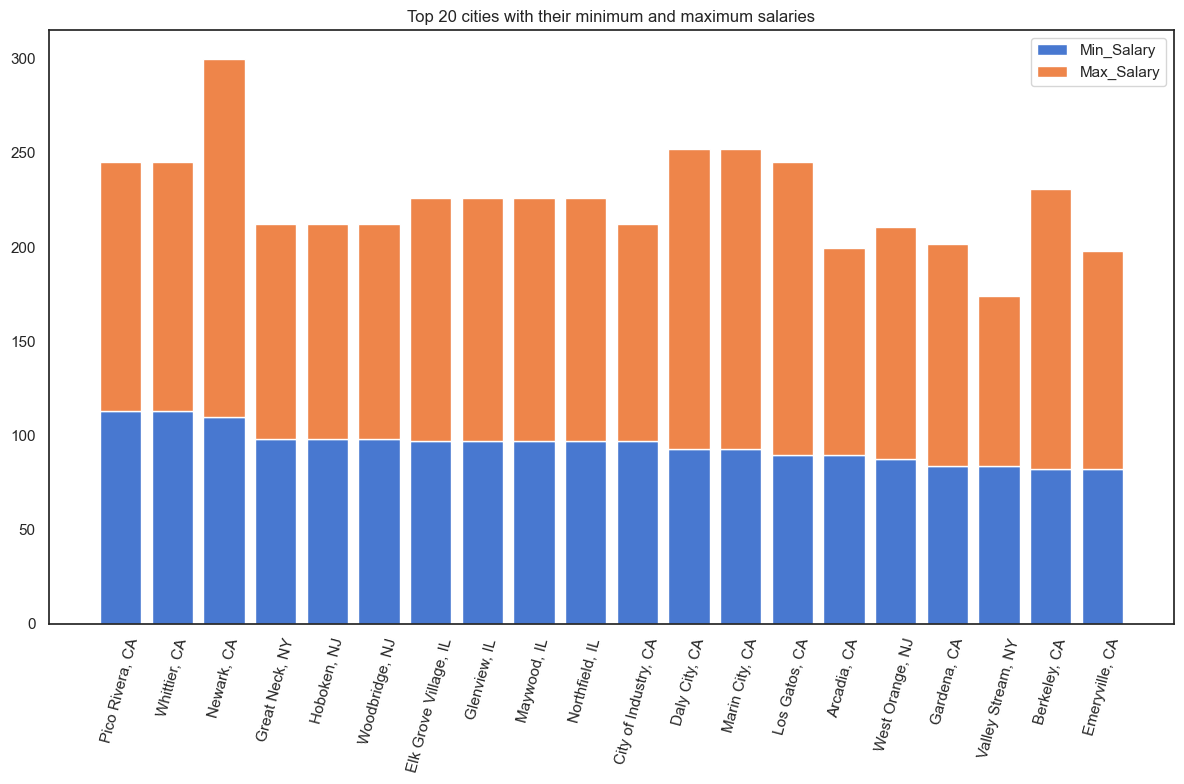

In [88]:
bar_plot(df, df['Min_Salary'], df['Max_Salary'])

In [93]:
df = job_df.groupby('Job Title')['Max_Salary', 'Min_Salary'].mean().sort_values(['Max_Salary', 'Min_Salary'], ascending=False).head(20)
df

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Max_Salary,Min_Salary
Job Title,,
AI Insights Data Analyst,190.0,110.0
Data Analyst with Data Mapping and API,190.0,110.0
"Data Analyst, Autonomy Operations",190.0,110.0
"Data Analyst, Product Insights",190.0,110.0
Senior Data Analyst Studio Finance Engineering,190.0,110.0
Senior HR Data Analyst,190.0,110.0
Sr. Data Analyst - Growth & Adoption,190.0,110.0
Tableau Data Analyst Intern,190.0,110.0
Business Intelligence Data Modeler/Analyst,178.0,99.0


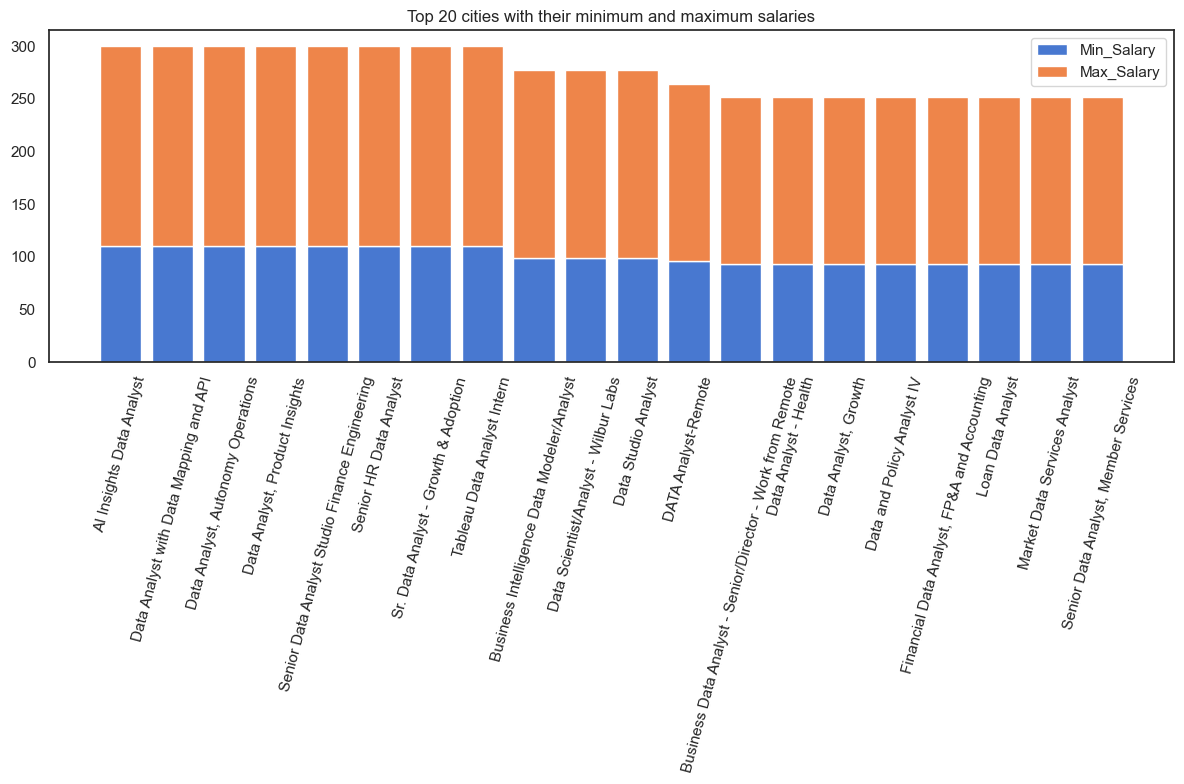

In [94]:
bar_plot(df, df['Min_Salary'], df['Max_Salary'])

## Missed Value